# 1.3 Real world/Business Objectives and Constraints

1)The cost of a mis-classification can be very high.
2)You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3)No strict latency concerns.
4)Interpretability is partially important.

# load the dataset for a basic overview

In [1]:
import pandas as pd
df=pd.read_csv('train.csv')


In [2]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [3]:
df.shape

(1306122, 3)

# type of machine learning problem

given a question, we have to predict whether the question is sincere or not, so basically it is a binary classification problem

# performance metric

f1-score

# Exploratory data analysis

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

In [5]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


# therefore there are no null values

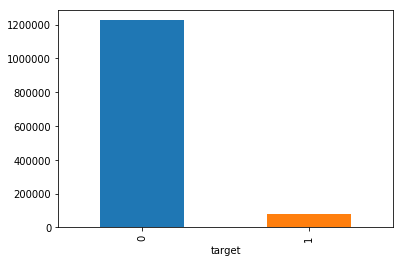

In [7]:
df.groupby("target")['qid'].count().plot.bar()

In [8]:
df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

the labels are in the ratio of 0.8 : 12!, this is a severely imbalanced data, and could result to overfitting,
which could result in a poor generalization of the model in most cases but imbalance is expected in this case.

# now let's check for unique questions.

In [9]:
qids = pd.Series(df['qid'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 1306122

Number of unique questions that appear more than one time: 0 (0.0%)

Max number of times a single question is repeated: 1



# now let's check for repeated questions.

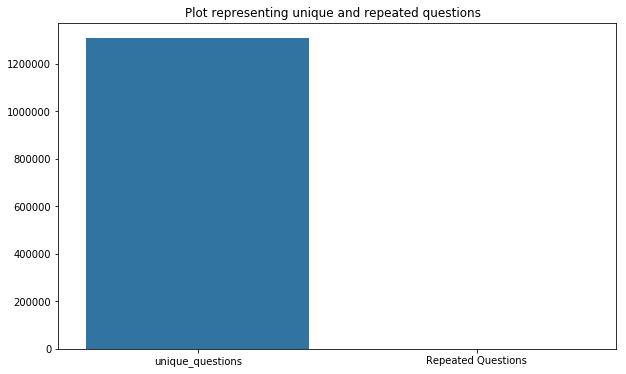

In [10]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

# good! there are no repeated questions.

# checking for duplicates.

In [11]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid','target']].groupby(['qid']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


# checking for null values

In [12]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [qid, question_text, target]
Index: []


# getting some features before data cleaning

.freq_qid = Frequency of qid's
.qlen = Length of q
.q_n_words = Number of words in a Question 

In [13]:
df['freq_qid'] = df.groupby('qid')['qid'].transform('count') 
    
df['qlen'] = df['question_text'].str.len() 
   
df['q_n_words'] = df['question_text'].apply(lambda row: len(row.split(" ")))
    


df.head()

,qid,question_text,target,freq_qid,qlen,q_n_words
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,1,72,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,1,81,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,1,67,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,1,57,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,1,77,15


# now check whether the extracted features are useful or not

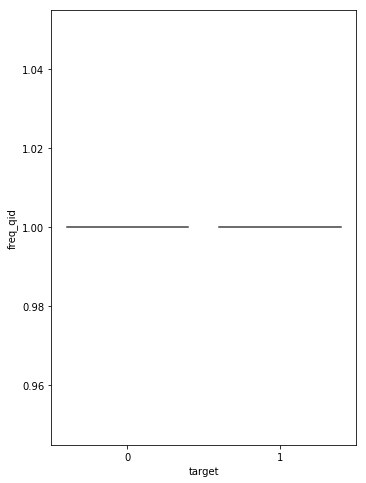

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'target', y = 'freq_qid', data = df[0:])


plt.show()

# the freq_qid is useless as i expected.facepalm! let's check for others too.

C:\Users\Abhinay\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



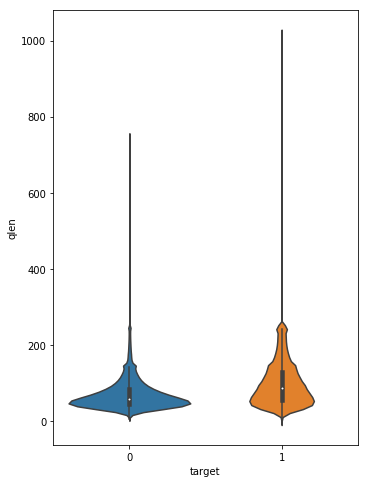

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'target', y = 'qlen', data = df[0:])


plt.show()

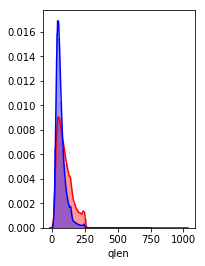

In [16]:
plt.subplot(1,2,2)
sns.distplot(df[df['target'] == 1.0]['qlen'][0:] , label = "1", color = 'red')
sns.distplot(df[df['target'] == 0.0]['qlen'][0:] , label = "0" , color = 'blue' )
plt.show()

# most of the points are overlapping, but there is some seperation, which is slightly useful.

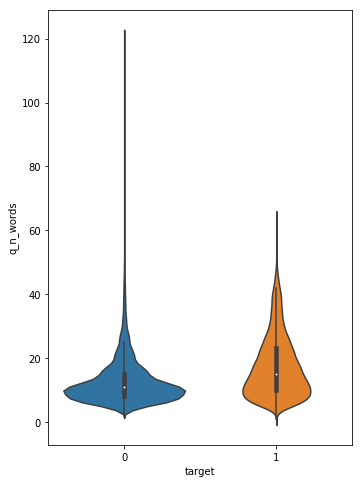

In [17]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'target', y = 'q_n_words', data = df[0:])


plt.show()

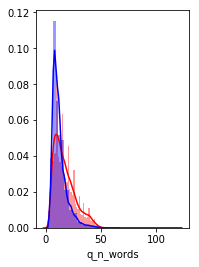

In [18]:
plt.subplot(1,2,2)
sns.distplot(df[df['target'] == 1.0]['q_n_words'][0:] , label = "1", color = 'red')
sns.distplot(df[df['target'] == 0.0]['q_n_words'][0:] , label = "0" , color = 'blue' )
plt.show()

# the q_n_words feature is also pretty useful for classification.

# now let's clean the text features

removing:
html tags,stopwords,punctuations
performing stemming.

In [19]:
STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

In [20]:
df["question_text"] = df["question_text"].fillna("").apply(preprocess)

# now we will extract more features using the pretrained glove vectors, because it is pretrained on the wikipedia corpus.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

In [22]:
df['question_text'] = df['question_text'].apply(lambda x: str(x))

In [23]:
df.head()

,qid,question_text,target,freq_qid,qlen,q_n_words
0,00002165364db923c7e6,how did quebec nationalists see their province...,0,1,72,13
1,000032939017120e6e44,do you have an adopted dog how would you enco...,0,1,81,16
2,0000412ca6e4628ce2cf,why does velocity affect time does velocity a...,0,1,67,10
3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0,1,57,9
4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0,1,77,15


# getting the tf-idf values, we are going to take the weighted average, with tf-idf scores

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(df['question_text'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [25]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
import en_core_web_sm
nlp = en_core_web_sm.load()

nlp = spacy.load('en_core_web_sm')

vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['question_text'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), 384])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q_feats_m'] = list(vecs1)

100%|█████████████████████████████████████████████████████████████████████| 1306122/1306122 [2:59:15<00:00, 121.44it/s]


# machine learning models

# data preparation

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [27]:
df.head()

,qid,question_text,target,freq_qid,qlen,q_n_words,q_feats_m
0,00002165364db923c7e6,how did quebec nationalists see their province...,0,1,72,13,"[21.524854481220245, 56.35288651287556, 8.9563..."
1,000032939017120e6e44,do you have an adopted dog how would you enco...,0,1,81,16,"[67.57917856052518, 71.43108570575714, 120.344..."
2,0000412ca6e4628ce2cf,why does velocity affect time does velocity a...,0,1,67,10,"[86.74285724759102, 42.07093957811594, 8.46724..."
3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0,1,57,9,"[-40.81930935382843, 76.77869713306427, 39.069..."
4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0,1,77,15,"[57.00484251976013, 87.98099666833878, -41.473..."


In [42]:
df1 = df.drop(['qid','question_text','target','freq_qid'],axis=1)

In [44]:
df1.head()

,qlen,q_n_words,q_feats_m
0,72,13,"[21.524854481220245, 56.35288651287556, 8.9563..."
1,81,16,"[67.57917856052518, 71.43108570575714, 120.344..."
2,67,10,"[86.74285724759102, 42.07093957811594, 8.46724..."
3,57,9,"[-40.81930935382843, 76.77869713306427, 39.069..."
4,77,15,"[57.00484251976013, 87.98099666833878, -41.473..."


In [46]:
df3_q1 = pd.DataFrame(df1.q_feats_m.values.tolist(), index= df1.index)

In [47]:
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,21.524854,56.352887,8.956394,13.390648,-35.415486,63.404058,-162.898081,-58.553886,76.048157,26.556506,...,9.845237,12.767768,2.420324,-3.558673,3.843903,-3.197114,-14.441623,9.463263,2.676317,1.649289
1,67.579179,71.431086,120.344270,43.841959,16.719797,75.014375,-95.820286,-53.953235,95.529834,7.490059,...,8.614737,26.435007,1.890881,-9.250139,25.382998,18.311363,-11.814505,6.443544,3.587824,1.432166
2,86.742857,42.070940,8.467244,25.864784,-14.963030,121.325916,-151.137401,-82.679168,150.913916,67.883593,...,10.231939,29.335210,10.864282,-9.547253,5.266141,-1.898310,-7.482347,-1.931243,1.737118,0.019275
3,-40.819309,76.778697,39.069462,10.170607,-142.318129,143.713479,-169.139311,-66.521890,35.444705,37.108944,...,22.843349,25.434301,10.530986,-1.447546,15.058863,-5.585366,-8.776152,1.317819,8.200339,5.968974
4,57.004843,87.980997,-41.473982,124.494278,-60.799741,112.550019,-195.898418,-50.289049,78.899649,65.615494,...,9.172087,33.421002,10.810527,-1.465403,-2.564339,-10.406216,-17.423274,1.530978,15.641189,8.667722


In [49]:
df2=df1.drop(['q_feats_m'], axis=1)

In [50]:
x=pd.concat([df2,df3_q1], axis=1)

In [51]:
x.head()

,qlen,q_n_words,0,1,2,3,4,5,6,7,...,374,375,376,377,378,379,380,381,382,383
0,72,13,21.524854,56.352887,8.956394,13.390648,-35.415486,63.404058,-162.898081,-58.553886,...,9.845237,12.767768,2.420324,-3.558673,3.843903,-3.197114,-14.441623,9.463263,2.676317,1.649289
1,81,16,67.579179,71.431086,120.344270,43.841959,16.719797,75.014375,-95.820286,-53.953235,...,8.614737,26.435007,1.890881,-9.250139,25.382998,18.311363,-11.814505,6.443544,3.587824,1.432166
2,67,10,86.742857,42.070940,8.467244,25.864784,-14.963030,121.325916,-151.137401,-82.679168,...,10.231939,29.335210,10.864282,-9.547253,5.266141,-1.898310,-7.482347,-1.931243,1.737118,0.019275
3,57,9,-40.819309,76.778697,39.069462,10.170607,-142.318129,143.713479,-169.139311,-66.521890,...,22.843349,25.434301,10.530986,-1.447546,15.058863,-5.585366,-8.776152,1.317819,8.200339,5.968974
4,77,15,57.004843,87.980997,-41.473982,124.494278,-60.799741,112.550019,-195.898418,-50.289049,...,9.172087,33.421002,10.810527,-1.465403,-2.564339,-10.406216,-17.423274,1.530978,15.641189,8.667722


In [52]:
y=df['target']

# train-test split

In [53]:
X_train,X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3)

In [64]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# building a random model for the worst log-loss

In [65]:
test_len=len(y_test)

Log loss on Test Data using Random Model 0.885011713177414


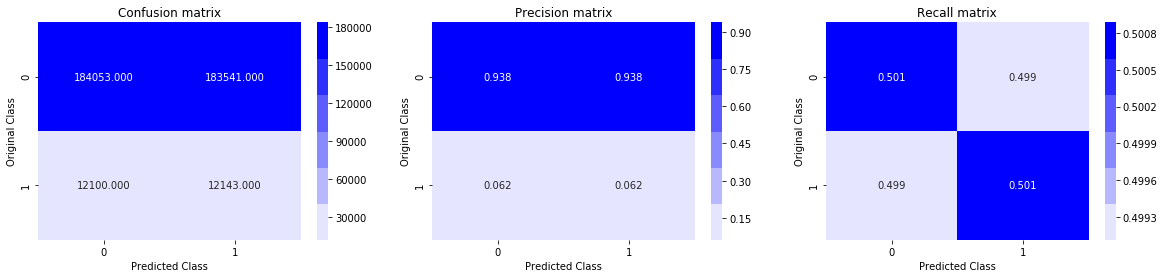

In [66]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [73]:
def threshold_search(y_true, y_proba):
    best_threshold = 0
    best_score = 0
    for threshold in [i * 0.01 for i in range(100)]:
        score = f1_score(y_true=y_true, y_pred=y_proba > threshold)
        if score > best_score:
            best_threshold = threshold
            best_score = score
    search_result = {'threshold': best_threshold, 'f1': best_score}
    return search_result

# logistic regression with hyper parameter tuning

For values of alpha =  1e-05 The log loss is: 0.20847967421368319
For values of alpha =  0.0001 The log loss is: 0.19873242075000125
For values of alpha =  0.001 The log loss is: 0.20151892847802155
For values of alpha =  0.01 The log loss is: 0.19643005117256868
For values of alpha =  0.1 The log loss is: 0.19242010492897849
For values of alpha =  1 The log loss is: 0.18252074213824612
For values of alpha =  10 The log loss is: 0.19777826684119995


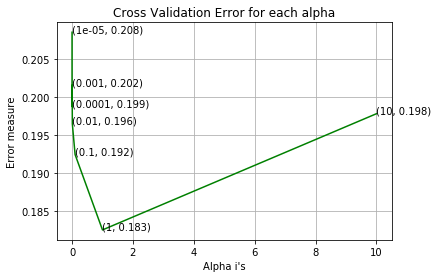

For values of best alpha =  1 The train log loss is: 0.18189218006457764
For values of best alpha =  1 The test log loss is: 0.18252074213824612
Total number of data points : 391837


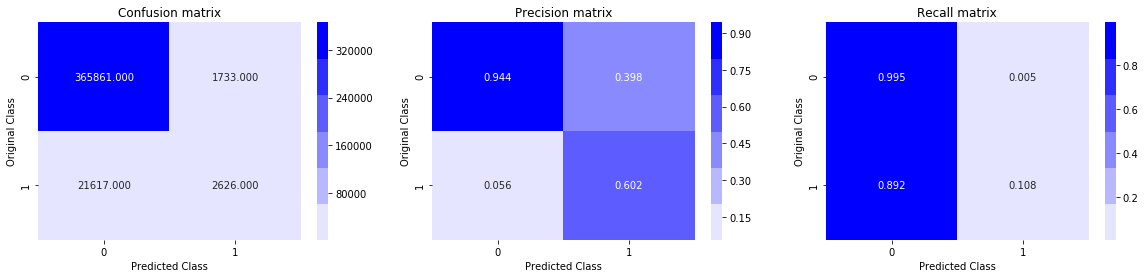

In [75]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,labels=clf.classes_,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# xg-boost

In [76]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The log_loss  is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[18:04:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-logloss:0.6776	valid-logloss:0.677605
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[18:04:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:04:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:04:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:04:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:04:46] C:\Users\Administrator\Desktop\xgbo

[18:12:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:12:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:12:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:12:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:12:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:13:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:13:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[18:20:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:20:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:21:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:21:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:21:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:21:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[18:29:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:29:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:29:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:30:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:30:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:30:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[160]	train-logloss:0.197298	valid-logloss:0.197839
[18:30:32] C:\Users\Administrator\Desktop\

[18:38:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:38:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:38:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:38:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[210]	train-logloss:0.189444	valid-logloss:0.190159
[18:39:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:39:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:39:31] C:\Users\Administrator\Desktop\

[18:47:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:48:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[260]	train-logloss:0.185144	valid-logloss:0.186079
[18:48:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:48:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:48:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:48:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:48:56] C:\Users\Administrator\Desktop\

[18:57:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:57:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:57:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:57:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:57:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:58:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:58:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:06:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:06:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:06:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:07:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:07:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:07:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:07:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e